# Deep learning Practical Assignment : Fully connected layers
Members: Rachico Mehdi - Belkacem Mohamed Ghaith                                                                               
Summary : In this notebook, we'll utilize Keras' fully connected layers to compare their performance on toy data to perceptron techniques, and then we'll use it on iris, digits, and faces datasets to study the limitations of these networks.

# Libraries used:

In [1]:
!pip install tensorflow==2.7.0
!pip install numpy==1.19.5
!pip install scikit-learn==1.0.1 
!pip install matplotlib==3.2.2 
!pip install keras==2.7.0 

In [2]:
from keras.models import Sequential
from sklearn.datasets import load_digits
from keras.utils import np_utils
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.utils import to_categorical, plot_model
import tensorflow as tf
import numpy as np

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

from sklearn import datasets

from keras.layers import Dense
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler

 ## Exp1: Toy dataset:

In this task, we will utilize the same toy dataset that yielded a good accuracy using the 
perceptron algorithm from the first assignment.

In [3]:
def generate_data(mu1, mu2, sigma1, sigma2, n, input_size):
  # the function generate_data constructs the dataset using standard deviation and mean values
  X1 = sigma1 * np.random.randn(n//2,input_size) + mu1
  X2 = sigma2 * np.random.randn(n//2,input_size) + mu2
  X =  np.concatenate((X1,X2))
  Y1 = -1*np.ones(n//2, dtype=int)
  Y2 = np.ones(n//2, dtype=int)
  y = np.concatenate((Y1,Y2))
  return X, y

In [4]:
def plot_dataset(input,target,title="Plot_dataset"):
  # function plot_dataset to plot 
  fig, ax = plt.subplots()
  scatter = plt.scatter(input[:,0], input[:,1], c=target, cmap="summer")
  legend = ax.legend(*scatter.legend_elements())
  plt.gca().set_ylim([-8, 8])
  ax.add_artist(legend)
  plt.title(title)

  plt.show()

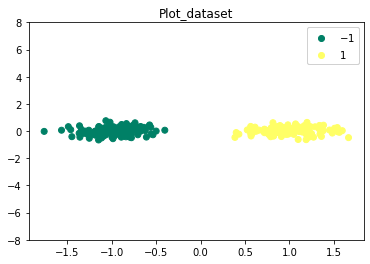

In [5]:
sigma1 = 0.25
sigma2 = 0.25
input_size = 2
mu1 = np.array([-1, 0])
mu2 = np.array([1, 0])

X,y = generate_data(mu1, mu2, sigma1, sigma2, 300 , input_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,shuffle=True)
plot_dataset(X_train, y_train)

Next, we'll define the model; because the data is linearly separable, we won't need numerous layers, thus a basic model with one dense layer will suffice.

In [6]:
# model definition
model = Sequential([Dense(2, input_dim=2, activation='softmax'),])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [7]:
# labels to categories transformation
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)

In [8]:
# model compilation
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model training
model.fit(X_train, y_train_cat, epochs=20, batch_size=4)
print('Model acccuracy:',model.evaluate(X_test,y_test_cat)[1])


Epoch 1/20
60/60 [==============================] - 0s 1ms/step - loss: 0.7526 - accuracy: 0.4958
Epoch 2/20
60/60 [==============================] - 0s 1ms/step - loss: 0.7186 - accuracy: 0.4958
Epoch 3/20
60/60 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.4958
Epoch 4/20
60/60 [==============================] - 0s 1ms/step - loss: 0.6550 - accuracy: 0.5042
Epoch 5/20
60/60 [==============================] - 0s 1ms/step - loss: 0.6252 - accuracy: 0.5292
Epoch 6/20
60/60 [==============================] - 0s 1ms/step - loss: 0.5972 - accuracy: 0.5583
Epoch 7/20
60/60 [==============================] - 0s 1ms/step - loss: 0.5703 - accuracy: 0.6250
Epoch 8/20
60/60 [==============================] - 0s 1ms/step - loss: 0.5446 - accuracy: 0.7292
Epoch 9/20
60/60 [==============================] - 0s 1ms/step - loss: 0.5204 - accuracy: 0.8250
Epoch 10/20
60/60 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.9292
Epoch 11/20
60/60 [

We can see that the model has reached 100% accuracy, which is to be expected given that the data is linearly separable.

## Exp2: Iris Dataset:
In this section, we will import the iris dataset from scikit-learn and then test several models by varying the depth of the network and the number of neurons in each layer.

([], <a list of 0 Text major ticklabel objects>)

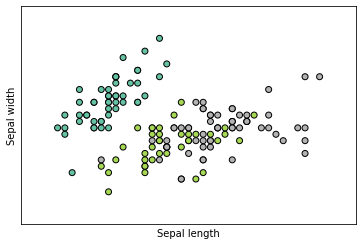

In [9]:
iris = datasets.load_iris()
# extracting the first two features.
X = iris.data[:, :2]  
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(6, 4))
plt.clf()

# Plotting the points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set2, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [11]:
def precision(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall



def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def create_keras_model(input_dim, output_dim, nodes, layers=1, name='model'):
    def create_model():
        # Create model
        model = Sequential(name=name)
        for i in range(layers):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # Compile model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy', 
                               tf.keras.metrics.Precision(), 
                               tf.keras.metrics.Recall(), 
                               tf.keras.metrics.AUC()])
                      
        return model
    return create_model
# Creating multiple models
# Output dimension is 3 , so we have 3 classes to work with
models = [create_keras_model(X_train.shape[1], 3, 10, i, 'model_{}'.format(i)) 
          for i in range(1, 5)]

for create_model in models:
    create_model().summary()
    


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                30        
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                30        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 3)        

In [13]:
for created_model in models:
    model = created_model()
    print('Model name:', model.name)
    history_callback = model.fit(X_train, y_train,
                                 batch_size=10,
                                 epochs=150,
                                 verbose=0
                                 )
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('Test precision:', score[2])
    print('Test recall:', score[3])
    print('Test f1_score:', score[4])

Model name: model_1
Test loss: 0.7479321956634521
Test accuracy: 0.7333333492279053
Test precision: 0.9230769276618958
Test recall: 0.4000000059604645
Test f1_score: 0.9008333086967468
Model name: model_2
Test loss: 0.4842672348022461
Test accuracy: 0.8666666746139526
Test precision: 0.8620689511299133
Test recall: 0.8333333134651184
Test f1_score: 0.9433333277702332
Model name: model_3
Test loss: 0.4277489483356476
Test accuracy: 0.800000011920929
Test precision: 0.800000011920929
Test recall: 0.800000011920929
Test f1_score: 0.9502778053283691
Model name: model_4
Test loss: 0.41929733753204346
Test accuracy: 0.7666666507720947
Test precision: 0.7666666507720947
Test recall: 0.7666666507720947
Test f1_score: 0.9519444704055786


## Experiment 3: Digits dataset:
In this step, we will repeat the previous procedure: we will build various models with different hyperparameters and test their performance on the digits datasets.

<Figure size 432x288 with 0 Axes>

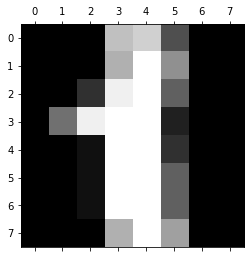

In [14]:
digits = load_digits()
plt.gray()
plt.matshow(digits.images[1])
plt.show()

In [15]:
yDigit = digits.target
x_digits = digits.images.reshape((len(digits.images), -1))
print(x_digits.shape)
print(yDigit.shape)


(1797, 64)
(1797,)


In [16]:
y_digits = np_utils.to_categorical(digits.target,10)
train_img, test_img, train_label, test_label = train_test_split(x_digits, y_digits, test_size=0.2, random_state=0)
def plot_sample(X, y, index):
    plt.imshow(X[index])        
    plt.xlabel(y[index])
print(train_img.shape)
print(train_label.shape)

(1437, 64)
(1437, 10)


In [17]:
# Creating multiple models
# Output dimension is 10 , we have 10 classes to work with
models = [create_keras_model(train_img.shape[1], 10, 10, i, 'model_{}'.format(i)) 
          for i in range(1, 6)]
for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 10)                650       
                                                                 
 dense_44 (Dense)            (None, 10)                110       
                                                                 
Total params: 760
Trainable params: 760
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 10)                650       
                                                                 
 dense_46 (Dense)            (None, 10)                110       
                                                                 
 dense_47 (Dense)            (None, 10)     

In [18]:
for created_model in models:
    model = created_model()
    print('Model_name:', model.name)
    callback = model.fit(train_img, train_label,
                                 batch_size=10,
                                 epochs=150,
                                 verbose=0
                                 )
    score = model.evaluate(test_img, test_label, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('Test precision:', score[2])
    print('Test recall:', score[3])
    print('Test f1_score:', score[4])

Model_name: model_1
Test loss: 0.23582670092582703
Test accuracy: 0.9611111283302307
Test precision: 0.9611111283302307
Test recall: 0.9611111283302307
Test f1_score: 0.9952178001403809
Model_name: model_2
Test loss: 0.3066001832485199
Test accuracy: 0.9527778029441833
Test precision: 0.9527778029441833
Test recall: 0.9527778029441833
Test f1_score: 0.9903544783592224
Model_name: model_3
Test loss: 0.8016722202301025
Test accuracy: 0.8999999761581421
Test precision: 0.8997214436531067
Test recall: 0.8972222208976746
Test f1_score: 0.9792094826698303
Model_name: model_4
Test loss: 0.32147252559661865
Test accuracy: 0.9555555582046509
Test precision: 0.9582172632217407
Test recall: 0.9555555582046509
Test f1_score: 0.9877589344978333
Model_name: model_5
Test loss: 0.4977242648601532
Test accuracy: 0.9305555820465088
Test precision: 0.9357541799545288
Test recall: 0.9305555820465088
Test f1_score: 0.9785412549972534


Best test accuracy achieved was 0,9611 that was achieved by model 1.

## Exp4: Face Data set:


In [19]:
data = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [20]:
print(data.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

In [21]:
faces = data.images
target = data.target
#Unique number of class outputs
all_classes = np.unique(target)
all_classes.sort()
all_classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [22]:
faces = faces.reshape((len(faces), -1))

In [23]:
face_target = np_utils.to_categorical(target, 40)
X_train, X_test, y_train, y_test = train_test_split(faces, face_target, test_size=0.2, stratify=target, random_state=0)
print(X_train.shape)
print(y_train.shape)

(320, 4096)
(320, 40)


In [24]:
# Creating multiple models
# Output dimensions is 40 , so we have 40 classes to work with
models = [create_keras_model(X_train.shape[1], 40, 50, i, 'model_{}'.format(i)) 
          for i in range(5, 10)]
for create_model in models:
    create_model().summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_83 (Dense)            (None, 50)                204850    
                                                                 
 dense_84 (Dense)            (None, 50)                2550      
                                                                 
 dense_85 (Dense)            (None, 50)                2550      
                                                                 
 dense_86 (Dense)            (None, 50)                2550      
                                                                 
 dense_87 (Dense)            (None, 50)                2550      
                                                                 
 dense_88 (Dense)            (None, 40)                2040      
                                                                 
Total params: 217,090
Trainable params: 217,090
Non-trainab

In [25]:
for created_model in models:
    model = created_model()
    print('Model name:', model.name)
    callback = model.fit(X_train, y_train,
                                 batch_size=10,
                                 epochs=150,
                                 verbose=0
                                 )
    score = model.evaluate(X_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('Test precision:', score[2])
    print('Test recall:', score[3])
    print('Test f1_score:', score[4])

Model name: model_5
Test loss: 2.612908124923706
Test accuracy: 0.17499999701976776
Test precision: 0.0
Test recall: 0.0
Test f1_score: 0.8883893489837646
Model name: model_6
Test loss: 2.2947733402252197
Test accuracy: 0.637499988079071
Test precision: 0.6521739363670349
Test recall: 0.5625
Test f1_score: 0.9113882780075073
Model name: model_7
Test loss: 3.0651907920837402
Test accuracy: 0.1875
Test precision: 0.5
Test recall: 0.03750000149011612
Test f1_score: 0.851189911365509
Model name: model_8
Test loss: 3.6888809204101562
Test accuracy: 0.02500000037252903
Test precision: 0.0
Test recall: 0.0
Test f1_score: 0.5
Model name: model_9
Test loss: 3.6888813972473145
Test accuracy: 0.02500000037252903
Test precision: 0.0
Test recall: 0.0
Test f1_score: 0.5


We can see that the models aren't very performant when it comes to photos, which is why CNN is offered as a superior solution.